In [2]:
from biokeen.convert import to_pykeen_df, to_pykeen_path
import pybel
import biokeen
import pykeen
from pykeen.kge_models import TransH
from pykeen.kge_models import TransR
import logging
import os
import sys
import time

In [2]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [3]:
full_graph = pybel.from_pickle("/home/raldisi/Desktop/full_graph.pickle")

In [1]:
#full_df = to_pykeen_df(full_graph)

In [4]:
to_pykeen_path(full_df, 'full_graph.keen.tsv')

True

In [3]:
config = dict(
    training_set_path           = '/home/rana/master_thesis/full_graph.keen.tsv',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransH',
    embedding_dim               = 50,
    scoring_function            = 2,  # corresponds to L2
    margin_loss                 = 0.05,
    weighting_soft_constraint   = 0.015625,
    learning_rate               = 0.01,
    num_epochs                  = 10,  
    batch_size                  = 64,
    test_set_ratio              = 0.1, # 10% of training set will be used as a test set
    filter_negative_triples     = True,
    preferred_device            = 'cpu'
)

In [4]:
results_TransH = pykeen.run(
    config=config,
    output_directory='/home/rana/master_thesis/TransH',
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 10/10 [20:47<00:00, 129.84s/it]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
⚽️ corrupting triples: 100%|██████████| 19364/19364 [7:14:38<00:00,  1.31s/it]  
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 26087.35s seconds


In [5]:
results_TransH.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

In [7]:
results_TransH.results['eval_summary']

{'mean_rank': 1263.4400692005784,
 'hits@k': {1: 0.007436480066102045,
  3: 0.021793017971493495,
  5: 0.03227638917579013,
  10: 0.05435343937203057}}

In [11]:
import numpy as np
import matplotlib.pyplot as plt

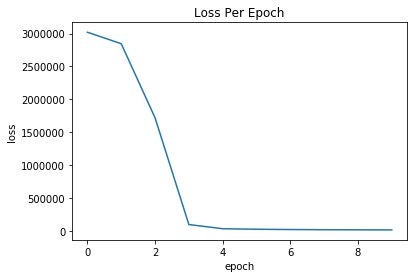

In [12]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()


In [9]:
sider_graph = pybel.from_pickle("/home/raldisi/Desktop/sider_graph.pickle")

In [10]:
sider_df = to_pykeen_df(sider_graph)
to_pykeen_path(sider_df, 'sider_graph.keen.tsv')

preparing TSV: 100%|██████████| 180203/180203 [00:02<00:00, 65343.22it/s]


True

In [3]:
config = dict(
    training_set_path           = '/home/raldisi/SE_KGE/notebooks/sider_graph.keen.tsv',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransR',
    embedding_dim               = 50,
    relation_embedding_dim      = 20,
    scoring_function            = 2,  # corresponds to L2
    margin_loss                 = 0.05,
    learning_rate               = 0.01,
    num_epochs                  = 10,  
    batch_size                  = 64,
    test_set_ratio              = 0.1, # 10% of training set will be used as a test set
    filter_negative_triples     = True,
    preferred_device            = 'cpu'
)


In [4]:
#using origin branch
results_TransR = pykeen.run(
    config=config,
    output_directory='/home/raldisi/Desktop/TransR',
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 10/10 [02:40<00:00, 16.07s/it]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
⚽️ corrupting triples: 100%|██████████| 18021/18021 [44:08<00:00,  6.89it/s]
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 2649.38s seconds


In [4]:
#using mapify-metric-computations branch
results_TransR_01 = pykeen.run(
    config=config,
    output_directory='/home/raldisi/Desktop/TransR_01',
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 10/10 [02:40<00:00, 16.06s/it]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
⚽️ computing ranks: 100%|██████████| 18021/18021 [45:44<00:00,  6.71it/s] 
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 2757.81 seconds


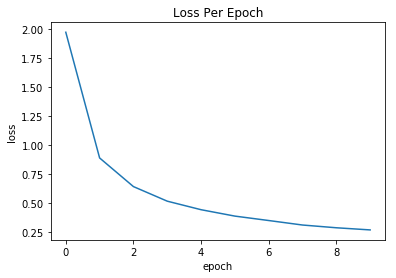

In [20]:
losses = results_TransR.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()


In [23]:
results.results["final_configuration"]

{'training_set_path': '/home/rana/master_thesis/full_graph.keen.tsv',
 'execution_mode': 'Training_mode',
 'random_seed': 0,
 'kg_embedding_model_name': 'TransH',
 'embedding_dim': 50,
 'scoring_function': 2,
 'margin_loss': 0.05,
 'weighting_soft_constraint': 0.015625,
 'learning_rate': 0.01,
 'num_epochs': 10,
 'batch_size': 64,
 'preferred_device': 'cpu',
 'num_entities': 13973,
 'num_relations': 3}

In [1]:
sider_graph = pybel.from_pickle("/home/rana/Downloads/sider_graph.pickle")

NameError: name 'pybel' is not defined

In [3]:
config = dict(
    training_set_path           = '/home/rana/master_thesis/sider_graph.keen.tsv',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransH',
    embedding_dim               = 20,
    scoring_function            = 2,  # corresponds to L2
    margin_loss                 = 0.05,
    weighting_soft_constraint   = 0.015625,
    learning_rate               = 0.01,
    num_epochs                  = 10,  
    batch_size                  = 64,
    test_set_ratio              = 0.1, # 10% of training set will be used as a test set
    filter_negative_triples     = True,
    preferred_device            = 'cpu'
)

In [3]:
sider_TransH = pykeen.run(
    config=config,
    output_directory='/home/rana/master_thesis/sider_TransH',
)

⚽️ corrupting triples: 100%|██████████| 18021/18021 [4:44:00<00:00,  1.13it/s]  


In [7]:
sider_TransH.results['eval_summary']

{'mean_rank': 5211.04478108873,
 'hits@k': {1: 0.0,
  3: 0.00011098163253981466,
  5: 0.00027745408134953665,
  10: 0.000998834692858332}}

In [24]:
chem_sim_graph = pybel.from_pickle("/home/raldisi/SE_KGE/resources/chem_sim_graph.pickle")
chem_sim_graph_df = to_pykeen_df(chem_sim_graph)
to_pykeen_path(chem_sim_graph_df, 'chem_sim_graph.keen.tsv')

preparing TSV: 100%|██████████| 114735/114735 [00:01<00:00, 70429.01it/s]


True

In [26]:
config = dict(
    training_set_path           = ['/home/raldisi/SE_KGE/notebooks/sider_graph.keen.tsv',
    '/home/raldisi/SE_KGE/notebooks/chem_sim_graph.keen.tsv'],
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransR',
    embedding_dim               = 50,
    relation_embedding_dim      = 20,
    scoring_function            = 2,  # corresponds to L2
    margin_loss                 = 0.05,
    learning_rate               = 0.01,
    num_epochs                  = 10,  
    batch_size                  = 64,
    test_set_ratio              = 0.1, # 10% of training set will be used as a test set
    filter_negative_triples     = True,
    preferred_device            = 'cpu'
)

In [27]:
chemsim_sider_TransH = pykeen.run(
    config=config,
    output_directory='/home/raldisi/Desktop/chemsim_sider',
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 10/10 [04:22<00:00, 27.01s/it]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
⚽️ corrupting triples: 100%|██████████| 29494/29494 [1:19:14<00:00,  6.26it/s]
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 4756.15s seconds


In [28]:
chemsim_sider_TransH.results['eval_summary']

{'mean_rank': 773.8134027259782,
 'hits@k': {1: 3.390520105784227e-05,
  3: 0.008238963857055673,
  5: 0.014884383264392757,
  10: 0.02866684749440564}}

In [5]:
sider_graph_se = pybel.from_pickle("/home/raldisi/Desktop/sider_graph_SE.pickle")
sider_graph_se_df = to_pykeen_df(sider_graph_se)


preparing TSV: 100%|██████████| 162952/162952 [00:02<00:00, 66861.61it/s]


In [6]:
to_pykeen_path(sider_graph_se_df, 'sider_graph_se.keen.tsv')

True

In [8]:
config = dict(
    training_set_path           = ['/home/raldisi/SE_KGE/notebooks/sider_graph_se.keen.tsv',
    '/home/raldisi/SE_KGE/notebooks/chem_sim_graph.keen.tsv'],
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransH',
    embedding_dim               = 50,
    scoring_function            = 2,  # corresponds to L2
    margin_loss                 = 0.05,
    weighting_soft_constraint   = 0.015625,
    learning_rate               = 0.01,
    num_epochs                  = 10,  
    batch_size                  = 64,
    test_set_ratio              = 0.1, # 10% of training set will be used as a test set
    filter_negative_triples     = True,
    preferred_device            = 'cpu'
)

In [9]:
chemsim_sider_TransH = pykeen.run(
    config=config,
    output_directory='/home/raldisi/Desktop/chemsim_sider_se',
)

⚽️ corrupting triples: 100%|██████████| 27769/27769 [55:30<00:00,  8.30it/s]


In [10]:
chemsim_sider_TransH.results['eval_summary']

{'mean_rank': 4256.747902337139,
 'hits@k': {1: 0.00010803413878785697,
  3: 0.001566495012423926,
  5: 0.002142677085959163,
  10: 0.0030969786452518995}}